In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# b.	Data Loading / Preprocessing

i.	Loading (4 points)
1.	Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the ‘pandas.read_csv’ function. The ‘df_test.csv’ has been preprocessed (I.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the the dataframe into X_test and y_test. The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled.  The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

2.	The resulting dataframe (i.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns. 

3.	In df_train, dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

4.	Use the ‘pandas.isnull().sum()’ function check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.
5.	Use the ‘pandas.DataFrame.drop()’ function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns.

6.	Use the ‘pandas.DataFrame.fillna()’ function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called `imputation` (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general. Use the ‘dropna()’ function to drop any remaining rows that consist of NA values. 

7.	Your task is to use the feature columns to predict the target column. This can be cast as a classification problem. 

8.	Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.



In [55]:
df_train=pd.read_csv('df_train.csv', na_values= "")
df_test=pd.read_csv('df_test.csv')

In [56]:
df_train.shape

(712, 12)

In [57]:
df_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [58]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

In [59]:
df_train.drop(['Cabin', 'PassengerId', 'Name','Ticket'], axis=1,inplace=True )
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,NaN,0,0,30.5000,S,1
1,3,female,27.0,0,2,11.1333,S,1
2,2,male,NaN,0,0,0.0000,S,0
3,3,female,9.0,4,2,31.2750,S,0
4,1,female,48.0,1,0,39.6000,C,1
...,...,...,...,...,...,...,...,...
707,3,male,19.0,0,0,14.5000,S,0
708,2,male,18.0,0,0,11.5000,S,0
709,1,male,17.0,0,2,110.8833,C,1
710,3,male,28.5,0,0,7.2292,C,0


In [60]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,29.811847,0,0,30.5000,S,1
1,3,female,27.000000,0,2,11.1333,S,1
2,2,male,29.811847,0,0,0.0000,S,0
3,3,female,9.000000,4,2,31.2750,S,0
4,1,female,48.000000,1,0,39.6000,C,1
...,...,...,...,...,...,...,...,...
707,3,male,19.000000,0,0,14.5000,S,0
708,2,male,18.000000,0,0,11.5000,S,0
709,1,male,17.000000,0,2,110.8833,C,1
710,3,male,28.500000,0,0,7.2292,C,0


In [61]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [62]:
X_train = df_train.drop(['Survived'], axis=1)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,male,29.811847,0,0,30.5000,S
1,3,female,27.000000,0,2,11.1333,S
2,2,male,29.811847,0,0,0.0000,S
3,3,female,9.000000,4,2,31.2750,S
4,1,female,48.000000,1,0,39.6000,C
...,...,...,...,...,...,...,...
707,3,male,19.000000,0,0,14.5000,S
708,2,male,18.000000,0,0,11.5000,S
709,1,male,17.000000,0,2,110.8833,C
710,3,male,28.500000,0,0,7.2292,C


In [63]:
y_train = df_train['Survived']
y_train

0      1
1      1
2      0
3      0
4      1
      ..
707    0
708    0
709    1
710    0
711    0
Name: Survived, Length: 710, dtype: int64

In [64]:
X_test = df_test.drop(['Survived'], axis=1)
y_test = df_test['Survived']

ii.	Data Visualization (4 points)
1.	Using matplotlib employ a scatter plot using ‘matplotlib.pyplot.scatter’ between the age of the passengers and the price of their fare. Label the x-axis and the y-axis along with the giving the plot a title. 

a.	What is the highest and lowest fare price?

b.	What are the respective mean values of these two features?

c.	What was the age of the oldest passenger?




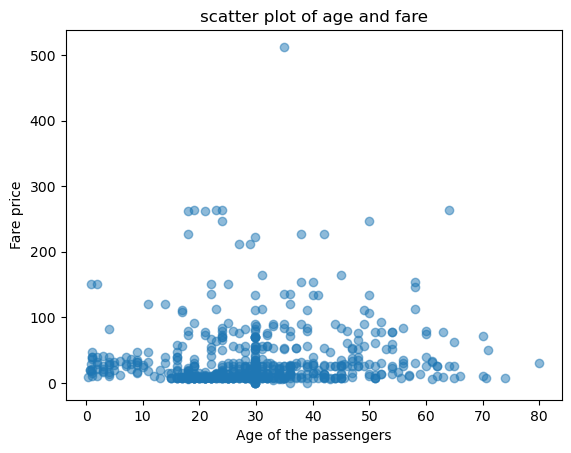

In [65]:
plt.scatter(X_train['Age'], X_train['Fare'], alpha=0.5)
plt.xlabel('Age of the passengers')
plt.ylabel('Fare price')
plt.title("scatter plot of age and fare")
plt.show()

In [66]:
print('The highest fare price is: ',max( X_train['Fare']) , 'and lowest fare price is ', min(X_train['Fare']))

The highest fare price is:  512.3292 and lowest fare price is  0.0


In [67]:
from statistics import mean 
print('The mean of fare price is: ',mean( X_train['Fare']) , 'and mean of age is ', mean(X_train['Age']))

The mean of fare price is:  32.52509295774648 and mean of age is  29.75497865240222


In [68]:
print('The age of the oldest passenger is :', max(X_train['Age']))

The age of the oldest passenger is : 80.0


2.	Only for this question use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using ‘matplotlib.pyplot.bar’ (Passenger Class column).




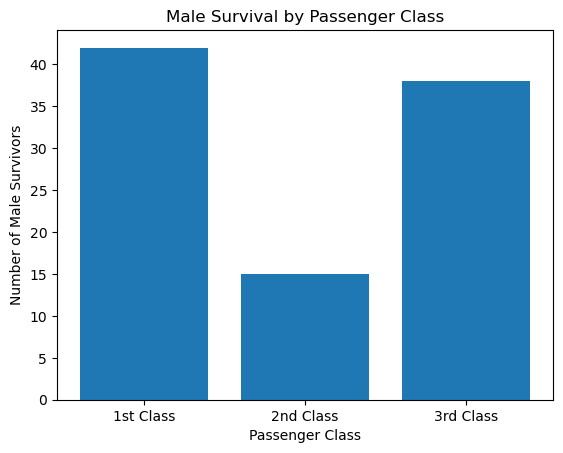

In [69]:
survived = df_train[df_train['Survived'] == 1]
males = survived[survived['Sex'] == 'male']
class_1 = len(males[males['Pclass'] == 1])
class_2 = len(males[males['Pclass'] == 2])
class_3 = len(males[males['Pclass'] == 3])

plt.bar(np.arange(3), [class_1, class_2, class_3], align='center')
plt.xticks(np.arange(3), ['1st Class', '2nd Class', '3rd Class'])
plt.ylabel('Number of Male Survivors')
plt.xlabel('Passenger Class')
plt.title('Male Survival by Passenger Class')

plt.show()

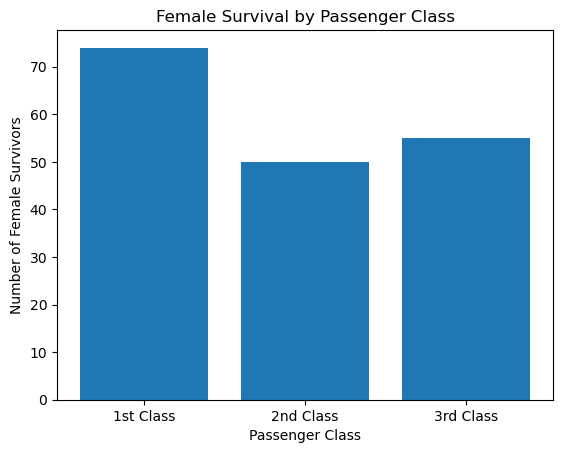

In [70]:
survived = df_train[df_train['Survived'] == 1]
females = survived[survived['Sex'] == 'female']
class_1 = len(females[females['Pclass'] == 1])
class_2 = len(females[females['Pclass'] == 2])
class_3 = len(females[females['Pclass'] == 3])


plt.bar(np.arange(3), [class_1, class_2, class_3], align='center')
plt.xticks(np.arange(3), ['1st Class', '2nd Class', '3rd Class'])
plt.ylabel('Number of Female Survivors')
plt.xlabel('Passenger Class')
plt.title('Female Survival by Passenger Class')

plt.show()

a.	Which class of passengers had the least number of survived males and how many? Repeat this analysis for females.

b.	Which class of passengers  had the greatest number of survived males and how many? Repeat this for females.

In [71]:
class_1 = len(males[males['Pclass'] == 1])
class_2 = len(males[males['Pclass'] == 2])
class_3 = len(males[males['Pclass'] == 3])
min_survived = min([class_1, class_2, class_3])
least_class = None
if min_survived == class_1:
    least_class = '1st Class'
elif min_survived == class_2:
    least_class = '2nd Class'
else:
    least_class = '3rd Class'

print(f'The class with the least number of survived males is {least_class} with {min_survived} survivors.')

max_survived = max([class_1, class_2, class_3])
greatest_class = None
if max_survived == class_1:
    greatest_class = '1st Class'
elif max_survived == class_2:
    greatest_class = '2nd Class'
else:
    greatest_class = '3rd Class'

# Print results
print(f'The class with the greatest number of survived males is {greatest_class} with {max_survived} survivors.')

The class with the least number of survived males is 2nd Class with 15 survivors.
The class with the greatest number of survived males is 1st Class with 42 survivors.


In [72]:
class_1 = len(females[females['Pclass'] == 1])
class_2 = len(females[females['Pclass'] == 2])
class_3 = len(females[females['Pclass'] == 3])
min_survived = min([class_1, class_2, class_3])
least_class = None
if min_survived == class_1:
    least_class = '1st Class'
elif min_survived == class_2:
    least_class = '2nd Class'
else:
    least_class = '3rd Class'

# Print results
print(f'The class with the least number of survived females is {least_class} with {min_survived} survivors.')

max_survived = max([class_1, class_2, class_3])
greatest_class = None
if max_survived == class_1:
    greatest_class = '1st Class'
elif max_survived == class_2:
    greatest_class = '2nd Class'
else:
    greatest_class = '3rd Class'

# Print results
print(f'The class with the greatest number of survived females is {greatest_class} with {max_survived} survivors.')

The class with the least number of survived females is 2nd Class with 50 survivors.
The class with the greatest number of survived females is 1st Class with 74 survivors.


3.	Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column.

a.	What initial comment can you make about this distribution in terms of the frequency of each class?


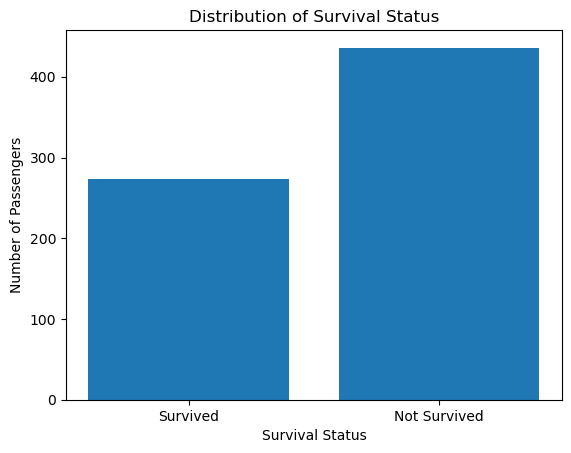

In [73]:
survived = len(y_train[y_train == 1])
not_survived = len(y_train[y_train == 0])

plt.bar(np.arange(2), [survived, not_survived], align='center')
plt.xticks(np.arange(2), ['Survived', 'Not Survived'])
plt.ylabel('Number of Passengers')
plt.xlabel('Survival Status')
plt.title('Distribution of Survival Status')

# Show plot
plt.show()

We can see that people who not survived are more than people who survived. Females and 1st class have higher survival rate, and 2nd class has least survival rate.

4.	So far you should have successfully been able to load, preprocess and visualize your data. Use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). (Perform this only on X_train store the result back into X_train).

a.	What is the new shape of X?


In [74]:
# Convert categorical data to dummy variables
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)

# Print new shape of X_train
print(f'The new shape of X_train is: {X_train.shape}')
X_train

The new shape of X_train is: (710, 8)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,29.811847,0,0,30.5000,1,0,1
1,3,27.000000,0,2,11.1333,0,0,1
2,2,29.811847,0,0,0.0000,1,0,1
3,3,9.000000,4,2,31.2750,0,0,1
4,1,48.000000,1,0,39.6000,0,0,0
...,...,...,...,...,...,...,...,...
707,3,19.000000,0,0,14.5000,1,0,1
708,2,18.000000,0,0,11.5000,1,0,1
709,1,17.000000,0,2,110.8833,1,0,0
710,3,28.500000,0,0,7.2292,1,0,0


# iii.	Data Scaling (2 points)
1.	Employ X_train and MinMaxScaler only on the continuous attributes. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the data. Store the scaled values in X_train again.


In [75]:
from sklearn.preprocessing import MinMaxScaler

continuous_attributes = ['Age', 'SibSp', 'Parch', 'Fare']

# Create scaler
scaler = MinMaxScaler()

# Scale continuous attributes
X_train[continuous_attributes] = scaler.fit_transform(X_train[continuous_attributes])

2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [76]:
X_test[continuous_attributes] = scaler.transform(X_test[continuous_attributes])

In [77]:
X_test.shape

(179, 8)

# c.	Modelling (10 points)
# i.	(2 points) Modelling (Model Instantiation / Training) using Logistic Regression classifier
1.	Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’

2.	Once instantiated, `fit()` the model using the scaled X_train, y_train data.

3.	Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

4.	Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model.


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate model
model_lr = LogisticRegression()

# Fit model to training data
model_lr.fit(X_train, y_train)

# Make predictions on test data
y_pred_lr = model_lr.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'The accuracy of the Logistic Regression model is: {accuracy:.4f}')

The accuracy of the Logistic Regression model is: 0.8827


# ii.	(2 points) Modelling (Model Instantiation / Training) using Support Vector Machine Classifier
1.	Employ the Support Vector Machine (SVM) classifier from sklearn () and instantiate the model. Label this model as ‘model_svm’

2.	Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm’. 

4.	Employ the ‘accuracy_score’ function by using the ‘y_pred_svm’ and ‘y_test’ variables as the functions parameters and print the accuracy of the SVM model.and print the accuracy of the SVM model.


In [80]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# Calculate accuracy of SVM model
print(accuracy_score(y_pred_svm, y_test))

0.8659217877094972


# iii.	(3 points) Modelling Logistic Regression Classifier with the addition of noise on the target variable. 
In the data repository you should see three noisy datasets – ‘df_train_noise20’, ‘df_train_40’, ‘df_train_60’. These datasets have already been preprocessed. In each dataset 'df_train_noise<integer>', the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in df_train_noise20, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far  'df_test'). 
Load the 'df_train_noise<nl>' (nl means noise level and is a place holder for the integer percentage) datasets and split the data into X_train_<nl> and y_train_<nl> (e.g., if working with `df_train_noise20’ we would split the data and store it in variables named X_train_20, y_train_20). ‘X_train_<nl>’ should store the features and ‘y_train_<nl>’ should store the target variable.

Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise level datasets.  
Train a new Logistic Regression model on the new training and use the pre-existing X_test and y_test to evaluate your model. Label this model as ‘model_lr_noise_<nl>’. Specifically, do the following:
1.	Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr_noise<nl>’

2.	Once instantiated, ‘fit()’ the model using the X_train_<nl> and y_train_<nl> data.

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr_noise<nl>’. 

4.	Employ the ‘accuracy_score’ function and print the accuracy of the new Logistic Regression model.
    



In [81]:
# Load data
df_train_noise20 = pd.read_csv('df_train_noise20.csv')
df_train_noise40 = pd.read_csv('df_train_noise40.csv')
df_train_noise60 = pd.read_csv('df_train_noise60.csv')

# Split data into X_train and y_train
X_train_20 = df_train_noise20.drop(columns=['Survived'])
y_train_20 = df_train_noise20['Survived']

X_train_40 = df_train_noise40.drop(columns=['Survived'])
y_train_40 = df_train_noise40['Survived']

X_train_60 = df_train_noise60.drop(columns=['Survived'])
y_train_60 = df_train_noise60['Survived']


In [83]:
model_lr_noise_20 = LogisticRegression()

# Fit model
model_lr_noise_20.fit(X_train_20, y_train_20)

# Obtain predictions on X_test
y_pred_lr_noise_20 = model_lr_noise_20.predict(X_test)

# Print accuracy of model
print(f'Accuracy of LogisticRegression model with 20% noise: {accuracy_score(y_test, y_pred_lr_noise_20)}')

model_lr_noise_40 = LogisticRegression()

# Fit model on X_train_40 and y_train_40
model_lr_noise_40.fit(X_train_40, y_train_40)

# Obtain predictions on X_test
y_pred_lr_noise_40 = model_lr_noise_40.predict(X_test)

# Print accuracy of model
print(f'Accuracy of LogisticRegression model with 40% noise: {accuracy_score(y_test, y_pred_lr_noise_40)}')

model_lr_noise_60 = LogisticRegression()

# Fit model on X_train_60 and y_train_60
model_lr_noise_60.fit(X_train_60, y_train_60)

# Obtain predictions on X_test
y_pred_lr_noise_60 = model_lr_noise_60.predict(X_test)

# Print accuracy of model
print(f'Accuracy of LogisticRegression model with 60% noise: {accuracy_score(y_test, y_pred_lr_noise_60)}')


Accuracy of LogisticRegression model with 20% noise: 0.7039106145251397
Accuracy of LogisticRegression model with 40% noise: 0.6312849162011173
Accuracy of LogisticRegression model with 60% noise: 0.39664804469273746


a.	What is your initial observation of the accuracy, is the accuracy higher or lower than that of the clean dataset?

With the increase of noise, the accuracy decrease as well.The accuracy lower than that of the clean dataset.This suggests that noise in the training data can negatively impact the performance of the model. The more noise there is in the training data, the lower the accuracy of the model.

# iv.	(3 points) Modelling Support Vector Machine (SVM) Classifier with the addition of noise on the target variable. 
In the data repository you should see three noisy datasets – ‘df_train_noise20’, ‘df_train_40’, ‘df_train_60’. These datasets have already been preprocessed. In each dataset 'df_train_noise<integer>, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in df_train_noise20, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far 'df_test’). 
Load the 'df_train_noise<nl>' (nl means noise level and is a place holder for the integer percentage) datasets and split the data into X_train_<nl> and y_train_<nl> (e.g., if working with `df_train_noise20’ we would split the data and store it in variables named X_train_20, y_train_20). ‘X_train_<nl>’ should store the features and ‘y_train_<nl>’ should store the target variable.

Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise datasets.  
Train a new SVM classification model on the new training and use the pre-existing X_test and y_test to evaluate your model. Label this model as ‘model_svm_noise_<nl>’.  Specifically, do the following:
1.	Employ a new SVM classifier from sklearn and instantiate the model. Label this model as ‘model_svm_noise<nl>’

2.	Once instantiated, ‘fit()’ the model using the X_train_<nl> and y_train_<nl> data.

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm_noise<nl>’. 

4.	Employ the ‘accuracy_score’ function and print the accuracy of the new Logistic Regression model.
a.	What is your initial observation of the accuracy, is the accuracy higher or lower than that of the clean dataset?


In [84]:
# Instantiate SVM classifier
model_svm_noise_20 = SVC()
model_svm_noise_40 = SVC()
model_svm_noise_60 = SVC()


# Fit model on X_train_20 and y_train_20
model_svm_noise_20.fit(X_train_20, y_train_20)

# Obtain predictions on X_test
y_pred_svm_noise_20 = model_svm_noise_20.predict(X_test)

# Print accuracy of model
print(f'Accuracy of SVM model with 20% noise: {accuracy_score(y_test, y_pred_svm_noise_20)}')

# Fit model on X_train_40 and y_train_40
model_svm_noise_40.fit(X_train_40, y_train_40)

# Obtain predictions on X_test
y_pred_svm_noise_40 = model_svm_noise_40.predict(X_test)

# Print accuracy of model
print(f'Accuracy of SVM model with 40% noise: {accuracy_score(y_test, y_pred_svm_noise_40)}')

# Fit model on X_train_60 and y_train_60
model_svm_noise_60.fit(X_train_60, y_train_60)

# Obtain predictions on X_test
y_pred_svm_noise_60 = model_svm_noise_60.predict(X_test)

# Print accuracy of model
print(f'Accuracy of SVM model with 60% noise: {accuracy_score(y_test, y_pred_svm_noise_60)}')


Accuracy of SVM model with 20% noise: 0.6703910614525139
Accuracy of SVM model with 40% noise: 0.6312849162011173
Accuracy of SVM model with 60% noise: 0.7318435754189944


It can be observed that the accuracy of the SVM model on the noisy training data is generally lower than that of the model trained on the clean dataset. This suggests that noise in the training data can negatively impact the performance of the model. The more noise there is in the training data, the lower the accuracy of the model.

# d.	Evaluation (5 points)
i.	(3 points) Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)
1.	Employ a `classification_report()` function from sklearn.metrics to report the precision recall and f1 score for each class for the ‘model_lr’ model and the ‘model_svm’ along with a confusion matrix for each of them. 

ii.	(2 points) Report the accuracy and classification report for each of the three noisy models (model_lr_noise<nl>, model_svm_noise<nl>).


In [86]:
# Import necessary libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print classification report for model_lr
print('Classification report for model_lr:')
print(classification_report(y_test, y_pred_lr))

# Print confusion matrix for model_lr
print('Confusion matrix for model_lr:')
print(confusion_matrix(y_test, y_pred_lr))

# Print classification report for model_svm
print('Classification report for model_svm:')
print(classification_report(y_test, y_pred_svm))

# Print confusion matrix for model_svm
print('Confusion matrix for model_svm:')
print(confusion_matrix(y_test, y_pred_svm))


Classification report for model_lr:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.86      0.82      0.84        66

    accuracy                           0.88       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179

Confusion matrix for model_lr:
[[104   9]
 [ 12  54]]
Classification report for model_svm:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       113
           1       0.96      0.67      0.79        66

    accuracy                           0.87       179
   macro avg       0.90      0.82      0.84       179
weighted avg       0.88      0.87      0.86       179

Confusion matrix for model_svm:
[[111   2]
 [ 22  44]]


In [88]:
# Print accuracy of model_lr_noise with 20% noise
print(f'Accuracy of model_lr_noise with 20% noise: {accuracy_score(y_test, y_pred_lr_noise_20)}')

# Print classification report for model_lr_noise with 20% noise
print('Classification report for model_lr_noise with 20% noise:')
print(classification_report(y_test, y_pred_lr_noise_20))


# Print accuracy of model_lr_noise with 40% noise
print(f'Accuracy of model_lr_noise with 40% noise: {accuracy_score(y_test, y_pred_lr_noise_40)}')

# Print classification report for model_lr_noise with 40% noise
print('Classification report for model_lr_noise with 40% noise:')
print(classification_report(y_test, y_pred_lr_noise_40))


# Print accuracy of model_lr_noise with 60% noise
print(f'Accuracy of model_lr_noise with 60% noise: {accuracy_score(y_test, y_pred_lr_noise_60)}')

# Print classification report for model_lr_noise with 40% noise
print('Classification report for model_lr_noise with 60% noise:')
print(classification_report(y_test, y_pred_lr_noise_60))


Accuracy of model_lr_noise with 20% noise: 0.7039106145251397
Classification report for model_lr_noise with 20% noise:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       113
           1       1.00      0.20      0.33        66

    accuracy                           0.70       179
   macro avg       0.84      0.60      0.57       179
weighted avg       0.80      0.70      0.63       179

Accuracy of model_lr_noise with 40% noise: 0.6312849162011173
Classification report for model_lr_noise with 40% noise:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       113
           1       0.00      0.00      0.00        66

    accuracy                           0.63       179
   macro avg       0.32      0.50      0.39       179
weighted avg       0.40      0.63      0.49       179

Accuracy of model_lr_noise with 60% noise: 0.39664804469273746
Classification report for model_lr_noise with

In [89]:
# Print accuracy of model_svm_noise with 20% noise
print(f'Accuracy of model_svm_noise with 20% noise: {accuracy_score(y_test, y_pred_svm_noise_20)}')

# Print classification report for model_svm_noise with 20% noise
print('Classification report for model_svm_noise with 20% noise:')
print(classification_report(y_test, y_pred_svm_noise_20))


# Print accuracy of model_svm_noise with 40% noise
print(f'Accuracy of model_svm_noise with 40% noise: {accuracy_score(y_test, y_pred_svm_noise_40)}')

# Print classification report for model_svm_noise with 40% noise
print('Classification report for model_svm_noise with 40% noise:')
print(classification_report(y_test, y_pred_svm_noise_40))

# Print accuracy of model_svm_noise with 60% noise
print(f'Accuracy of model_svm_noise with 60% noise: {accuracy_score(y_test, y_pred_svm_noise_60)}')

# Print classification report for model_svm_noise with 40% noise
print('Classification report for model_svm_noise with 60% noise:')
print(classification_report(y_test, y_pred_svm_noise_60))


Accuracy of model_svm_noise with 20% noise: 0.6703910614525139
Classification report for model_svm_noise with 20% noise:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       113
           1       1.00      0.11      0.19        66

    accuracy                           0.67       179
   macro avg       0.83      0.55      0.49       179
weighted avg       0.78      0.67      0.57       179

Accuracy of model_svm_noise with 40% noise: 0.6312849162011173
Classification report for model_svm_noise with 40% noise:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       113
           1       0.00      0.00      0.00        66

    accuracy                           0.63       179
   macro avg       0.32      0.50      0.39       179
weighted avg       0.40      0.63      0.49       179

Accuracy of model_svm_noise with 60% noise: 0.7318435754189944
Classification report for model_svm_noise

# e.	Discussion 

ii.	(4 points) Report the performance of all the classification models you have trained thus far in terms of (precision, recall, F1 scores). From the results of the three noisy models implemented using Logistic Regression. What did you notice about the accuracy as the noise of the dataset increased? What can you say about the effect of noise on data mining pipelines?

As the noise of the dataset increased, the accuracy of the model decreased. This suggests that noise in the dataset can have a negative impact on the performance of a data mining pipeline. Noise in the data can make it more difficult for the model to learn the underlying patterns in the data, resulting in lower accuracy and poorer performance. 